# Tiri per Squadra

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import urllib
import os
import numpy as np

In [2]:
font_path = "../Grafici/assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../Grafici/assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

In [3]:
df = pd.read_csv("./data/shooting.csv", sep='\t').set_index('Rk')[['Player', 'Gls', 'Sh']]
#df.plot.scatter('Sh', 'Gls')

In [4]:
def remove_noGls_noSh(df):
    for i in df.index:
        if df.loc[i].Gls == 0 or df.loc[i].Sh == 0:
            df.drop(i, inplace=True)
#remove_noGls_noSh(df)

## Visual

In [38]:
def plot_line(m, ax, **kwargs):
    op = lambda x: m*x
    x = [ax.get_ylim()[0]-5, ax.get_xlim()[1]+5]
    ax.plot(x, [op(x[0]), op(x[1])], **kwargs)

def ann(ax, pl, a = 0.5, b=0.5):
    ax.annotate(pl.Player, xy=(0,0), xytext=(pl.Sh+a, pl.Gls+b) )

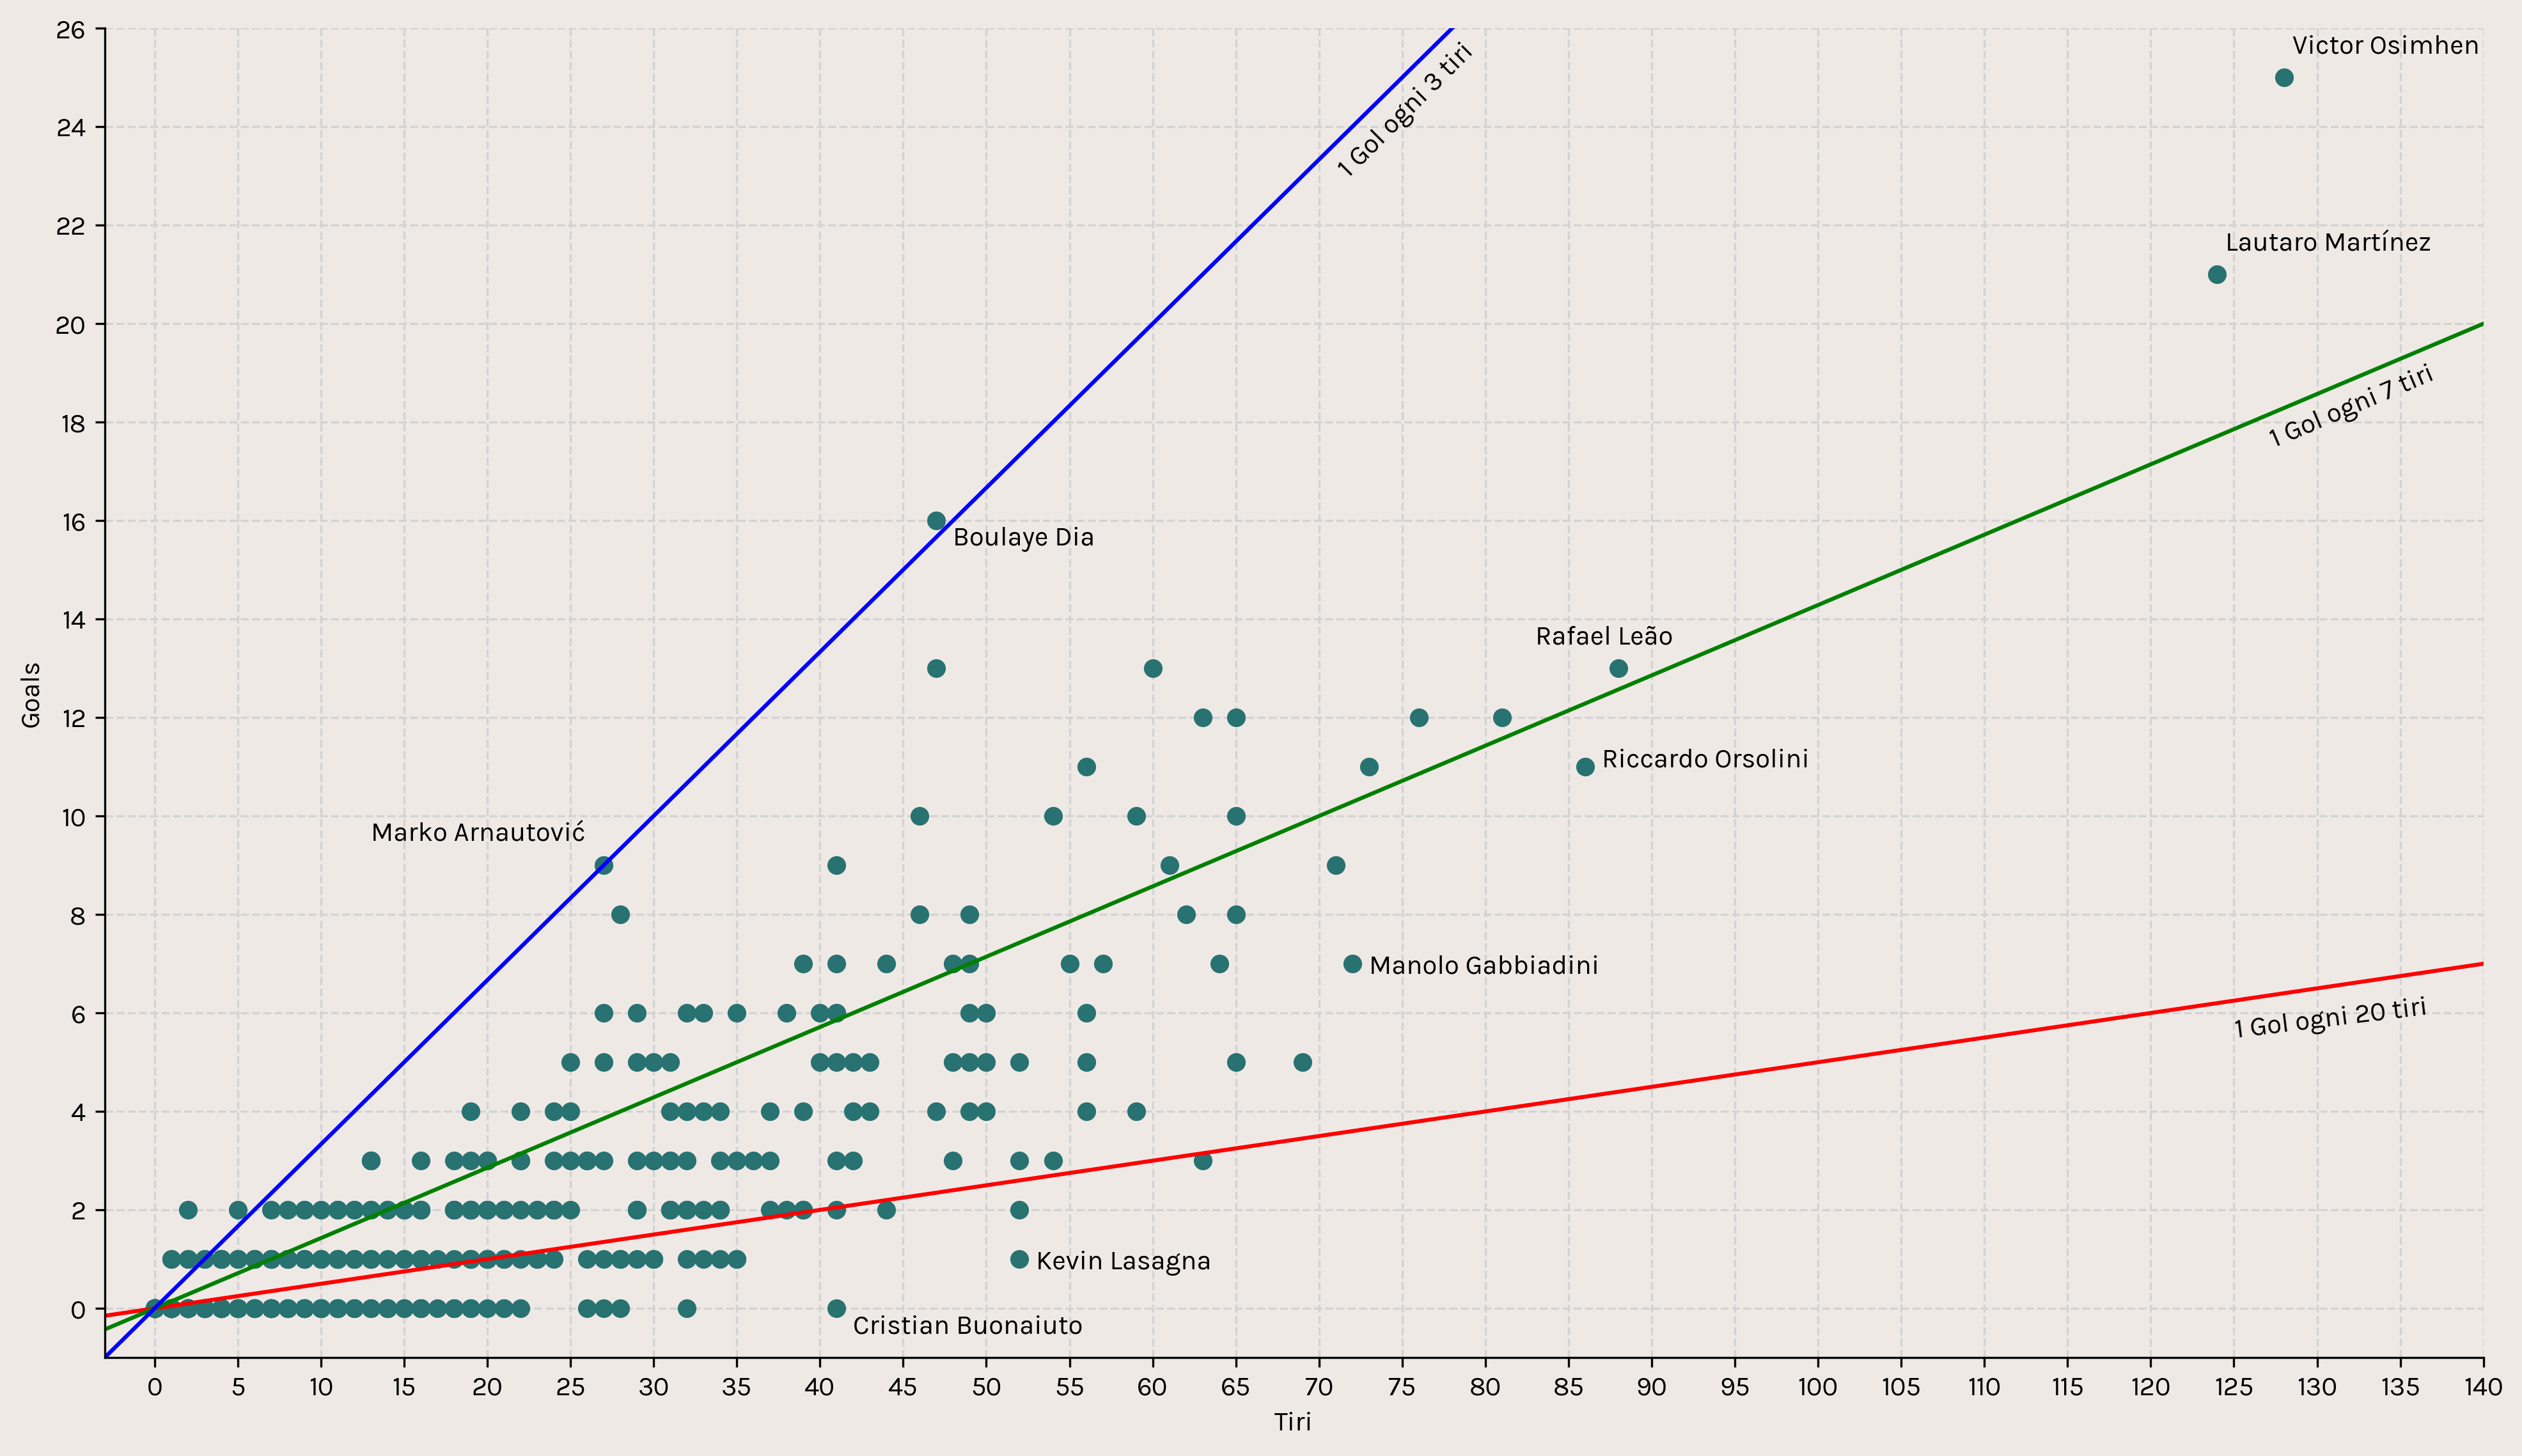

In [133]:
fig = plt.figure(figsize=(16, 9), dpi=300)
ax = plt.subplot()
ax.grid(visible=True, ls='--', color='lightgrey')

ax.set_ylim(-1, 26)
ax.set_xlim(-3, 140)
ax.set_ylabel("Goals")
ax.set_xlabel("Tiri")
ax.xaxis.set_ticks([x for x in range(0, 145, 5)])
ax.yaxis.set_ticks([x for x in range(0, 27, 2)])

ann(ax, df[df.Gls == 25].iloc[0])
ann(ax, df[df.Gls == 21].iloc[0])
ann(ax, df[df.Gls == 16].iloc[0], 1, -0.5)
ann(ax, df[(df.Gls == 9) & (df.Sh < 30)].iloc[0], -14)
ann(ax, df[df.Sh == 88].iloc[0], -5)
ann(ax, df[df.Sh == 86].iloc[0], 1, 0)
ann(ax, df[(df.Sh == 52) & (df.Gls == 1)].iloc[0], 1, -.2)
ann(ax, df[(df.Sh == 72) & (df.Gls == 7)].iloc[0], 1, -.2)
ann(ax, df[(df.Sh == 41) & (df.Gls == 0)].iloc[0], 1, -0.5)


ax.annotate("1 Gol ogni 20 tiri", xy=(0, 0), xytext=(125, 5.5)).set_rotation(7)
ax.annotate("1 Gol ogni 7 tiri", xy=(0, 0), xytext=(127, 17.5)).set_rotation(23)
ax.annotate("1 Gol ogni 3 tiri", xy=(0, 0), xytext=(71, 23)).set_rotation(45)


ax.scatter(
    df.Sh, df.Gls,
    zorder=2
)

plot_line(1/20, ax, color='red')
plot_line(1/7, ax, color='green')
plot_line(1/3 ,ax, color='blue')